In [2]:
# Installing libraries
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall
!pip install spacy
!pip install textblob
!python -m spacy download en_core_web_sm

  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /private/var/folders/62/nrb2x8tn6nl1qtqn66_155fc0000gn/T/pip-req-build-52cdfsva
  Running command git clone --filter=blob:none --quiet https://github.com/laxmimerit/preprocess_kgptalkie.git /private/var/folders/62/nrb2x8tn6nl1qtqn66_155fc0000gn/T/pip-req-build-52cdfsva
  Resolved https://github.com/laxmimerit/preprocess_kgptalkie.git to commit 9ca68d37027af9f6a30d54640347ce3b2e2694b3
  Preparing metadata (setup.py) ... done
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=7620 sha256=277524f0c90edabbe99b2e67439b9049113a4537d1d0edd5468d44f019a50090
  Stored in directory: /private/var/folders/62/nrb2x8tn6nl1qtqn66_155fc0000gn/T/pip-ephem-wheel-cache-32dq70fn/wheels/d1/c3/bb/559fe93e652b51cbc532f17e9693f3b70055f8560cf06c1fb3
Successfully built preprocess-kgptalkie


In [17]:
# Libraries
import dotenv
import os
from zipfile import ZipFile
import pandas as pd
import seaborn as sns
import nltk
from nltk.probability import FreqDist
import preprocess_kgptalkie as ps
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [33]:
# Importing credentials
envVar = dotenv.dotenv_values('.env')
print(envVar.keys())

odict_keys(['usr', 'pwd'])


In [34]:
# Setting kaggle credentials and downloading dataset
os.environ['KAGGLE_USERNAME'] = envVar['usr']
os.environ['KAGGLE_KEY'] = envVar['pwd']
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

 97%|████████████████████████████████████▉ | 25.0M/25.7M [00:01<00:00, 20.0MB/s]
100%|██████████████████████████████████████| 25.7M/25.7M [00:01<00:00, 15.6MB/s]


In [35]:
# Unzipping data
path = 'imdb-dataset-of-50k-movie-reviews.zip'
with ZipFile(path, 'r') as zip:
    zip.extractall()
    print('done')

done


In [2]:
# Reading data as df
df = pd.read_csv('IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


<Axes: >

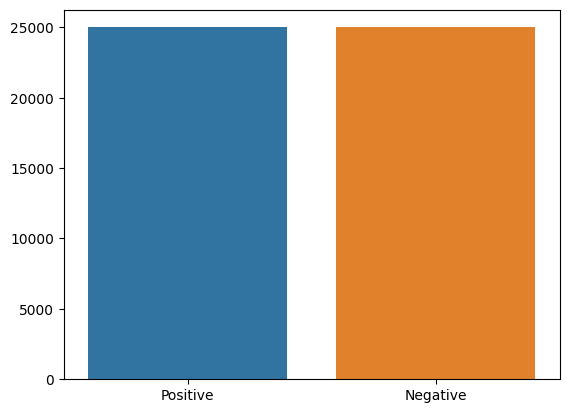

In [13]:
# Checking data balance
sns.barplot(x=['Positive', 'Negative'], y=df['sentiment'].value_counts().values)

<Axes: xlabel='review', ylabel='Count'>

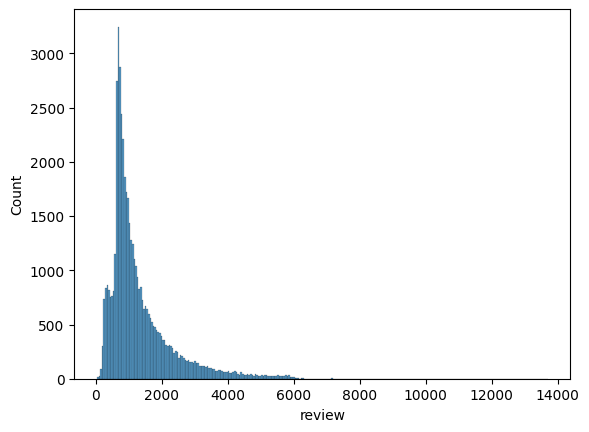

In [15]:
# words distribution
count = df['review'].apply(lambda x: len(x))
sns.histplot(count)

In [25]:
# Preprocessing function
def get_clean(x):
    x = str(x).lower().replace('\\', '').replace('_', ' ')
    x = ps.cont_exp(x)
    x = ps.remove_emails(x)
    x = ps.remove_urls(x)
    # x = ps.remove_html_tags(x)
    x = ps.remove_accented_chars(x)
    x = ps.remove_special_chars(x)
    x = re.sub("(.)\\1{2,}", "\\1", x)
    x = re.sub(r'br br', '', x)
    return x

In [26]:
# Cleaning reviews
df['review'] = df['review'].apply(lambda x: get_clean(x))
df.head(20)

In [41]:
# most frequent words
stackedReviews = ' '.join(df['review'].astype(str))
stackedReviews = re.split(' ', stackedReviews)
fdist = FreqDist(stackedReviews)
fdist.most_common(20)

[('the', 664222),
 ('and', 323357),
 ('a', 320762),
 ('of', 288690),
 ('is', 272649),
 ('to', 266963),
 ('it', 188273),
 ('in', 185254),
 ('i', 172744),
 ('this', 149920),
 ('that', 144431),
 ('not', 116294),
 ('was', 99858),
 ('as', 91289),
 ('with', 87003),
 ('for', 86861),
 ('movie', 85224),
 ('but', 81778),
 ('film', 76029),
 ('on', 69342)]

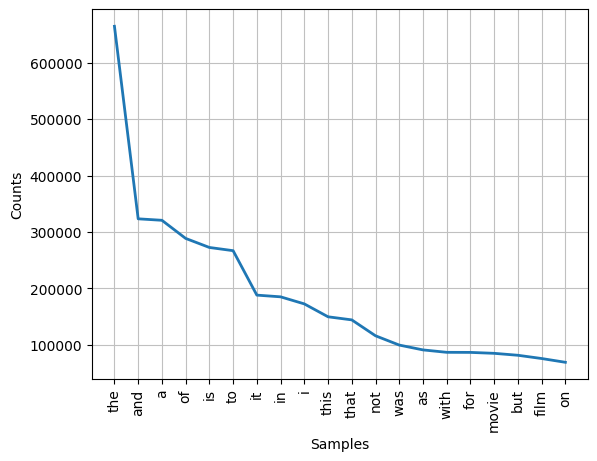

<Axes: xlabel='Samples', ylabel='Counts'>

In [42]:
# Freq plot
fdist.plot(20)

In [44]:
# Exporting data
df.to_csv('IMDBReviewsCleanned.csv')